# 使用phyphox测量机床振动实验报告

2251912 潘世维

## 思考题

(1)	为什么机床在加工状态下的加速度值通常大于空载状态？试结合振动来源说明原因。

(2)	从实验中测得的加速度波形中，如何判断机床是否存在异常振动？这些异常可能与哪些部件相关？



In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体

rcParams['font.family'] = 'Times New Roman'  # 设置字体

df_raw = pd.read_csv('Raw Data.csv')
df_raw.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.013409,2.955331,-0.444823,-3.551811,4.641897
1,0.033252,0.822898,0.585598,-1.840671,2.099560
2,0.053074,-0.925895,1.453325,0.033150,1.723524
3,0.072897,-1.287436,1.713825,0.383623,2.177580
4,0.092718,-0.559916,1.457300,-0.597300,1.671525


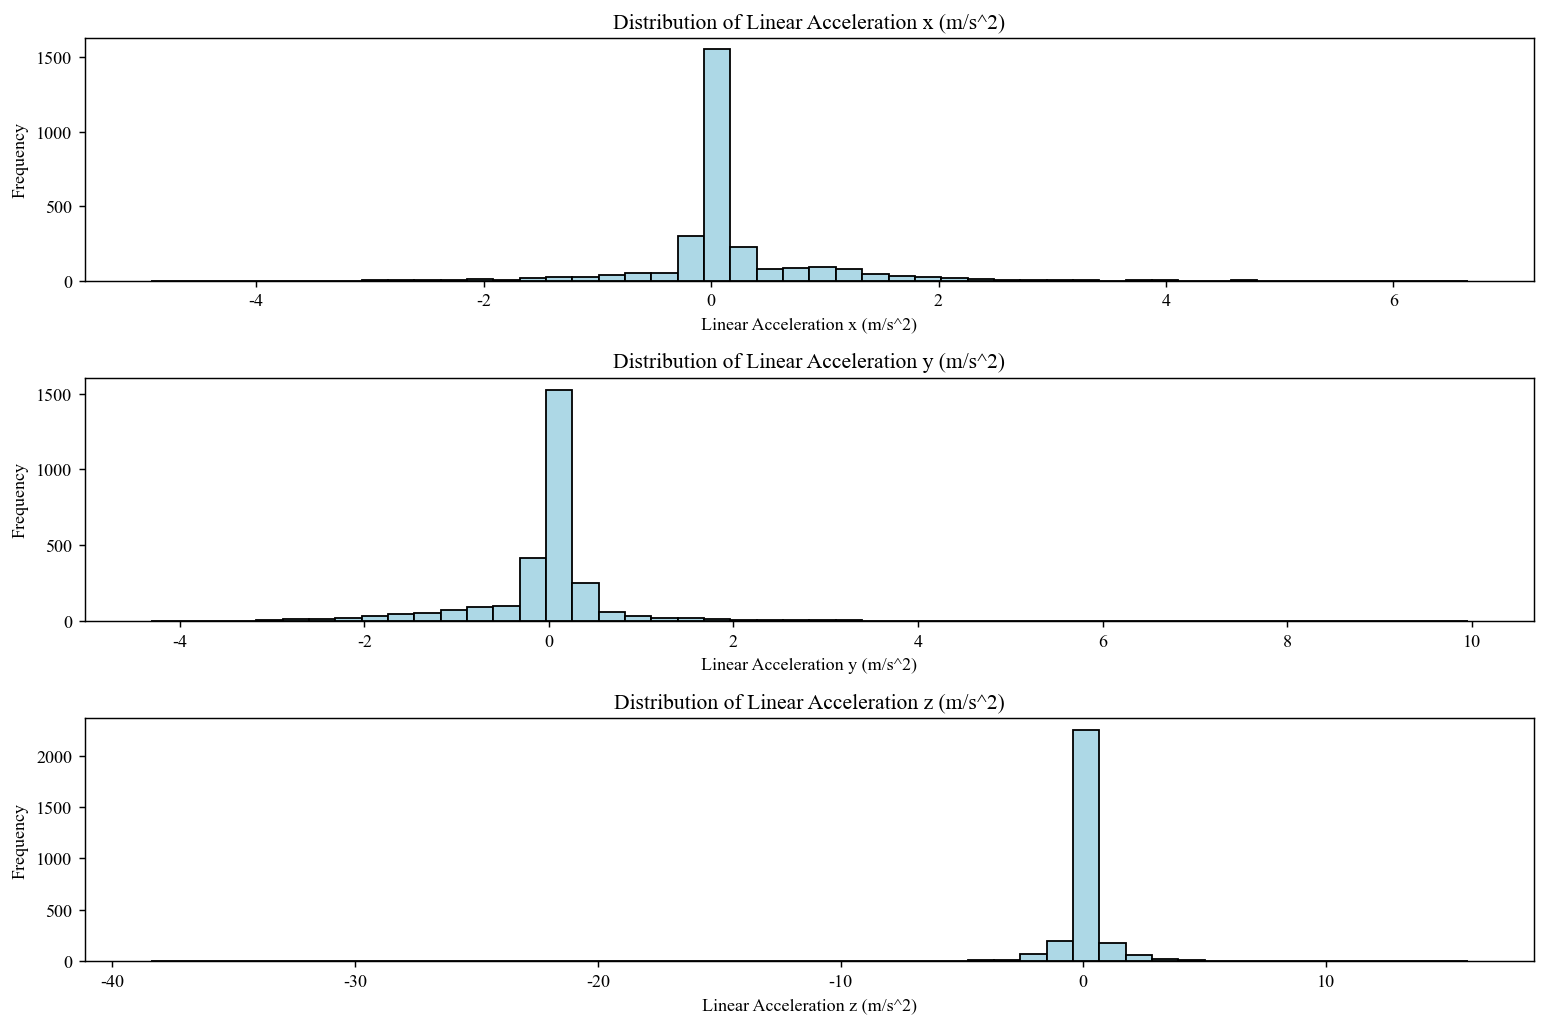

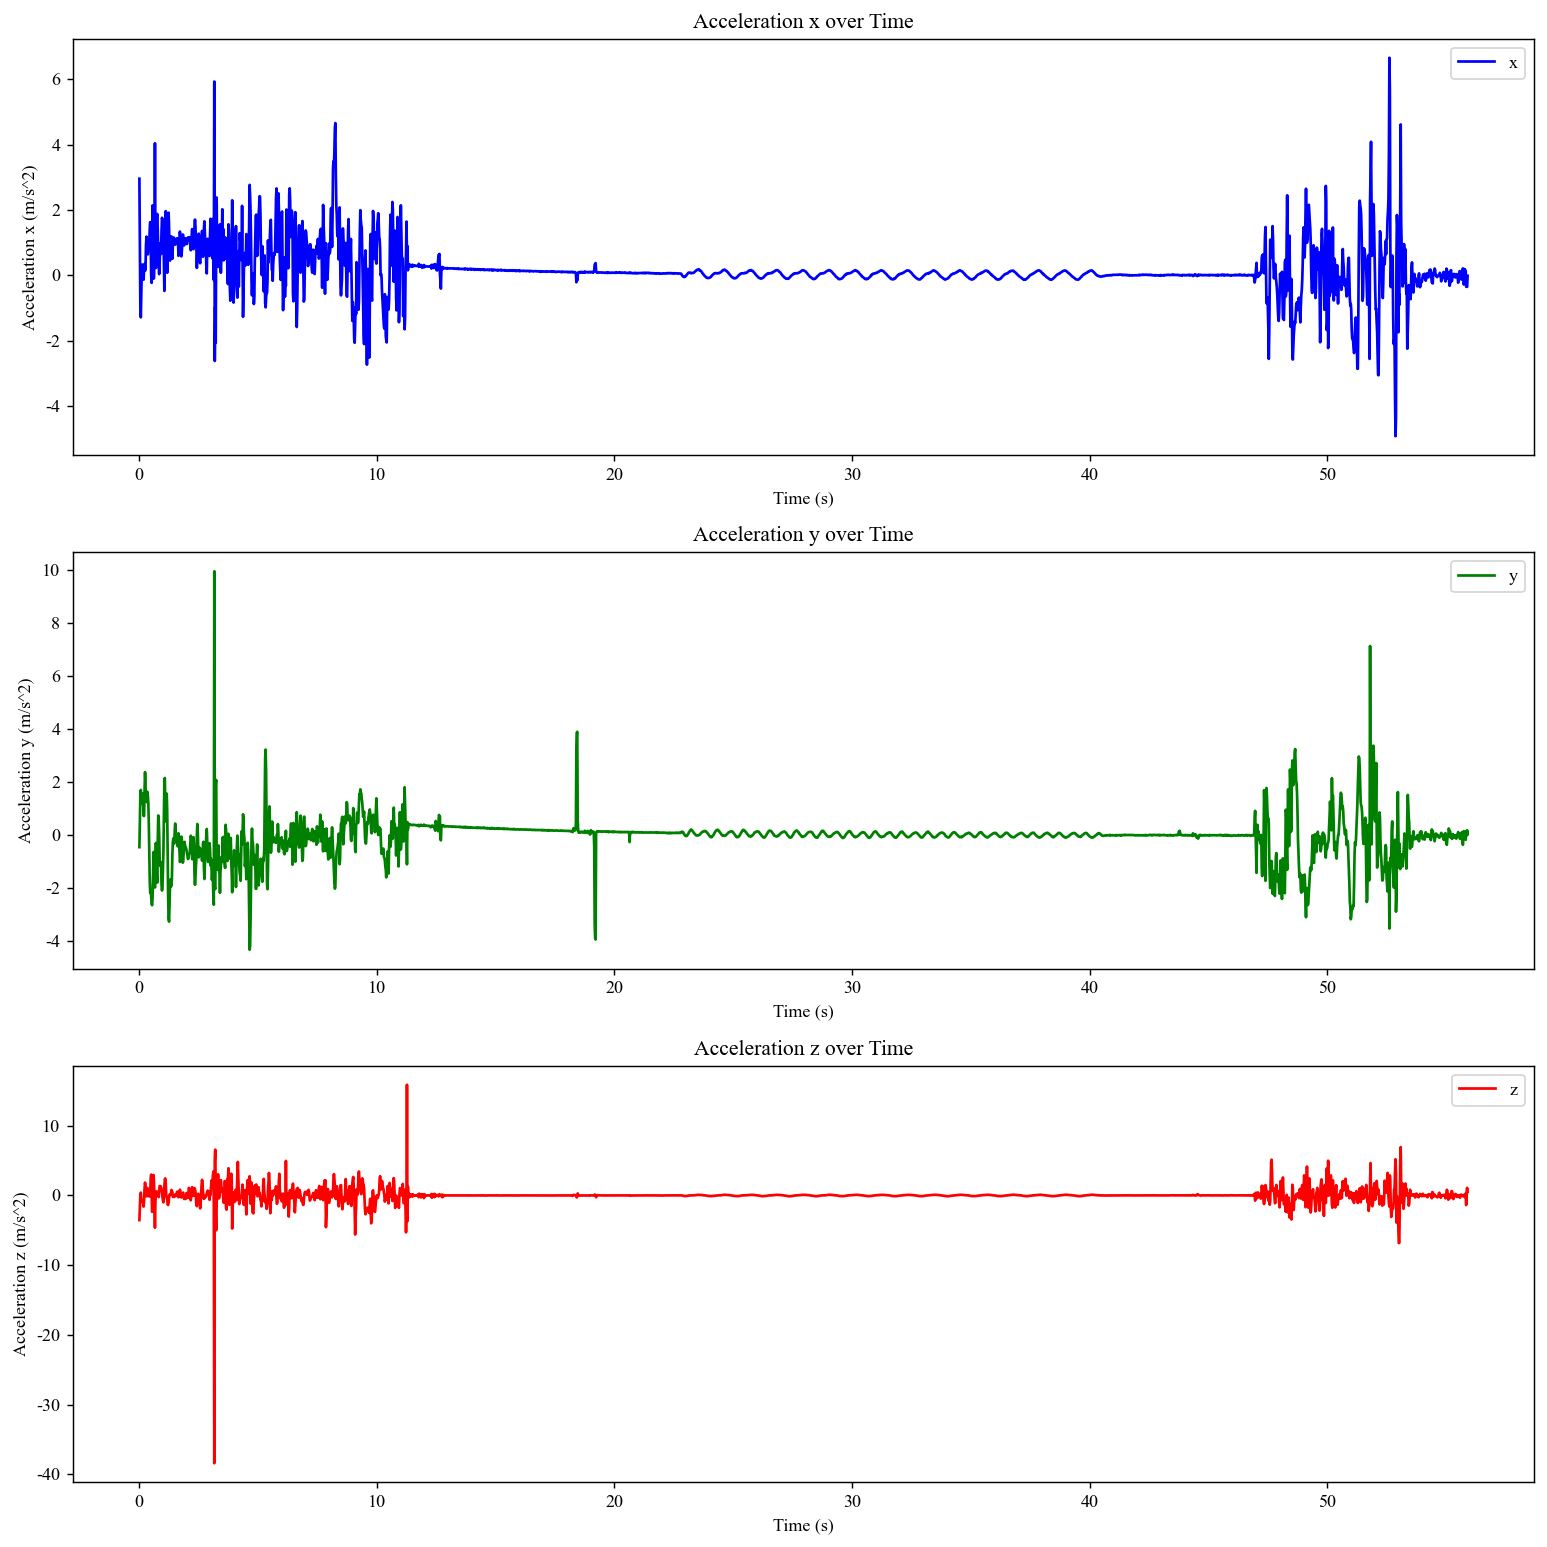

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_raw has already loaded the data
# df_raw = pd.read_csv('/tmp/Raw Data.csv')

acceleration_columns = ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)']

# 分布
plt.figure(figsize=(12, 8), dpi=130)
for i, col in enumerate(acceleration_columns):
    plt.subplot(3, 1, i + 1)
    plt.hist(df_raw[col], bins=50, color='lightblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot acceleration over time
plt.figure(figsize=(12, 12), dpi=130)

plt.subplot(3, 1, 1)
plt.plot(df_raw['Time (s)'], df_raw['Linear Acceleration x (m/s^2)'], label='x', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration x (m/s^2)')
plt.title('Acceleration x over Time')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_raw['Time (s)'], df_raw['Linear Acceleration y (m/s^2)'], label='y', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration y (m/s^2)')
plt.title('Acceleration y over Time')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_raw['Time (s)'], df_raw['Linear Acceleration z (m/s^2)'], label='z', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration z (m/s^2)')
plt.title('Acceleration z over Time')
plt.legend()

plt.tight_layout()
plt.show()

发现之后22到42是在机床上

In [23]:
df_sliced = df_raw[(df_raw['Time (s)'] >= 22) & (df_raw['Time (s)'] <= 42)]
df_sliced.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
1110,22.006027,0.052903,0.097424,-0.019713,0.112600
1111,22.025839,0.056455,0.097719,-0.018127,0.114301
1112,22.045672,0.054723,0.094687,-0.027334,0.112727
1113,22.065483,0.059886,0.106465,-0.027697,0.125253
1114,22.085314,0.056050,0.094798,-0.020842,0.112083


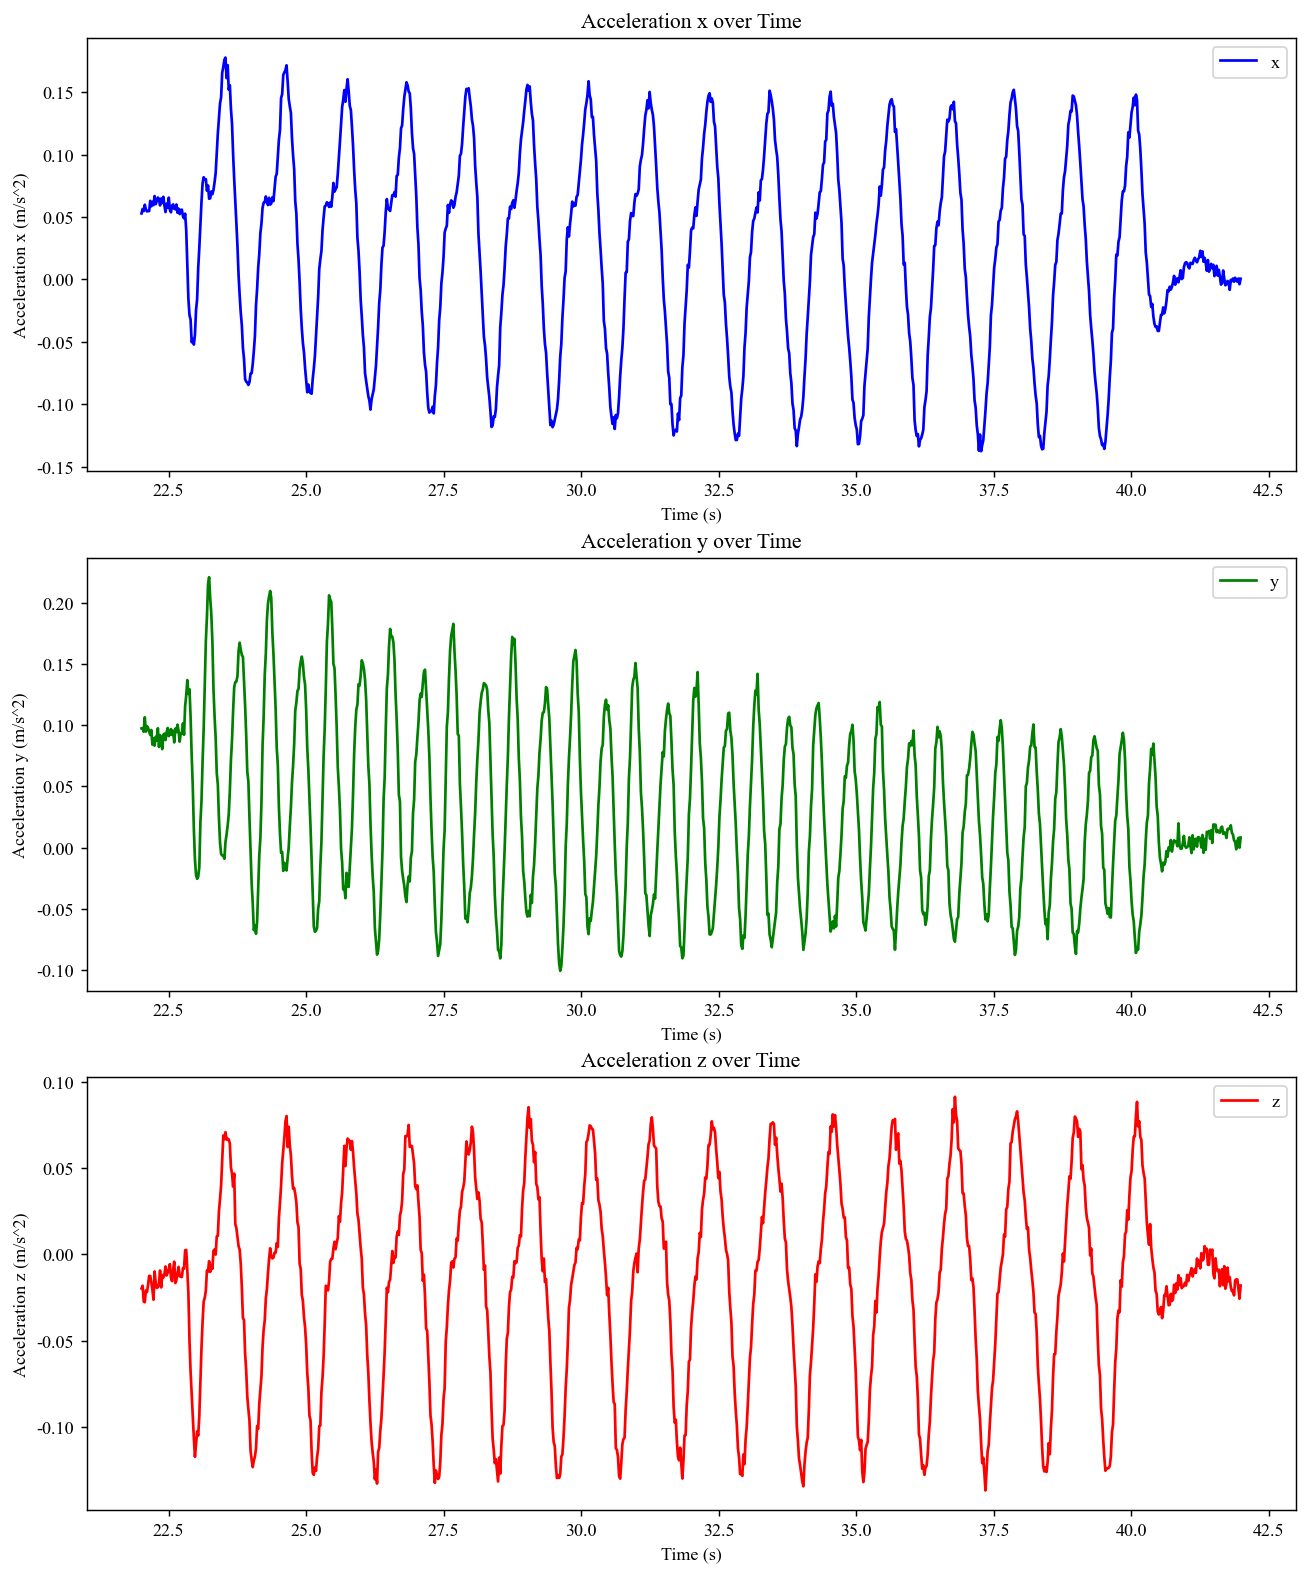

In [71]:
df_sliced = df_raw[(df_raw['Time (s)'] >= 22) & (df_raw['Time (s)'] <= 42)]
df_sliced.head()
# Plot acceleration over time
plt.figure(figsize=(12, 15), dpi=130)

plt.subplot(3, 1, 1)
plt.plot(df_sliced['Time (s)'], df_sliced['Linear Acceleration x (m/s^2)'], label='x', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration x (m/s^2)')
plt.title('Acceleration x over Time')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_sliced['Time (s)'], df_sliced['Linear Acceleration y (m/s^2)'], label='y', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration y (m/s^2)')
plt.title('Acceleration y over Time')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_sliced['Time (s)'], df_sliced['Linear Acceleration z (m/s^2)'], label='z', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration z (m/s^2)')
plt.title('Acceleration z over Time')
plt.legend()


对数据进行单边FFT变换

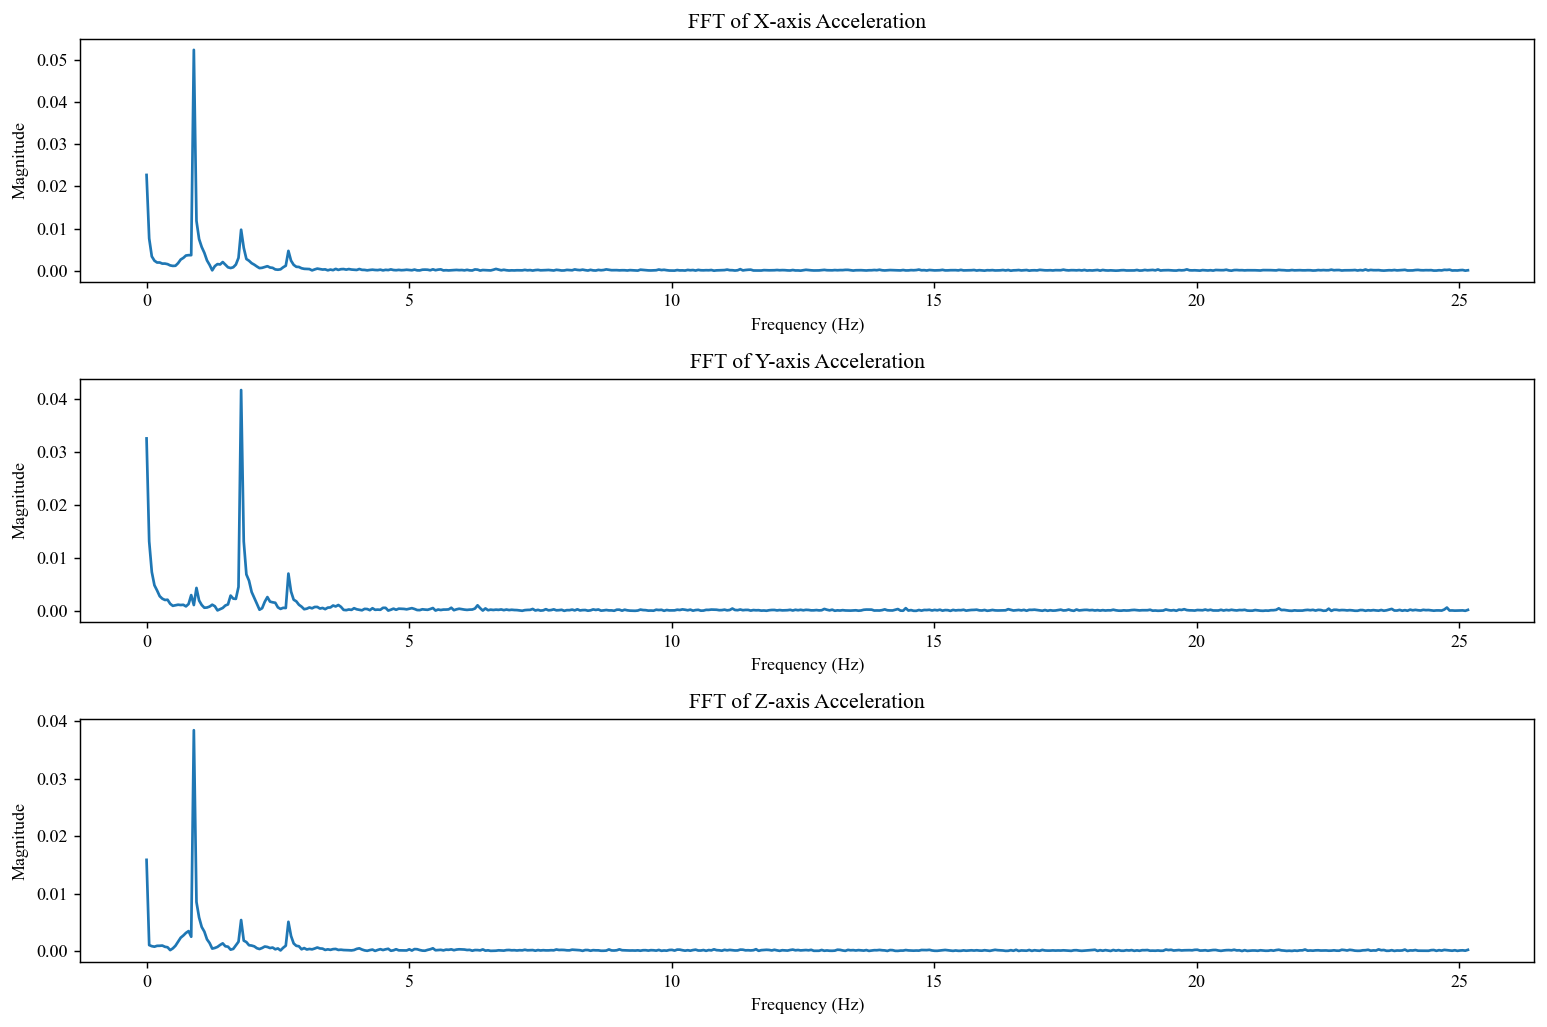

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# 从 df_sliced 中提取加速度数据和时间
time = df_sliced['Time (s)'].values
x_acc = df_sliced['Linear Acceleration x (m/s^2)'].values
y_acc = df_sliced['Linear Acceleration y (m/s^2)'].values
z_acc = df_sliced['Linear Acceleration z (m/s^2)'].values

# 计算采样频率
sampling_rate = 1 / (time[1] - time[0])

N = len(time)
xf = fftfreq(N, 1 / sampling_rate)
X = fft(x_acc) / N
Y = fft(y_acc) / N
Z = fft(z_acc) / N

# 由于对称性，只保留单边频谱
xf = xf[:N//2]
X = X[:N//2]
Y = Y[:N//2]
Z = Z[:N//2]

# 绘制频谱图
plt.figure(figsize=(12, 8), dpi=130)

plt.subplot(3, 1, 1)
plt.plot(xf, np.abs(X))
plt.title('FFT of X-axis Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.plot(xf, np.abs(Y))
plt.title('FFT of Y-axis Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 3)
plt.plot(xf, np.abs(Z))
plt.title('FFT of Z-axis Acceleration')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

In [67]:
import pandas as pd
import numpy as np

# 假设 xf 和 Z 已经计算出来
data = {
    "f_z": xf,
    "Magnitude": np.abs(Z)
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 按照 Magnitude 降序排序
df_sorted = df.sort_values(by="Magnitude", ascending=False)

# 提取前几个强度最大的点及其对应的频率
top_n = 15  # 选择前几个点
top_frequencies = df_sorted.head(top_n)

top_frequencies

,f_z,Magnitude
18,0.900460,0.038405
0,0.000000,0.015857
19,0.950486,0.008526
20,1.000511,0.005828
36,1.800920,0.005394
54,2.701380,0.005083
21,1.050537,0.004176
16,0.800409,0.003468
22,1.100562,0.003381
15,0.750383,0.003158


获取近似的最大频率

In [70]:
max(top_frequencies['f_z'])

2.751405511482869

对数坐标，转化为分贝

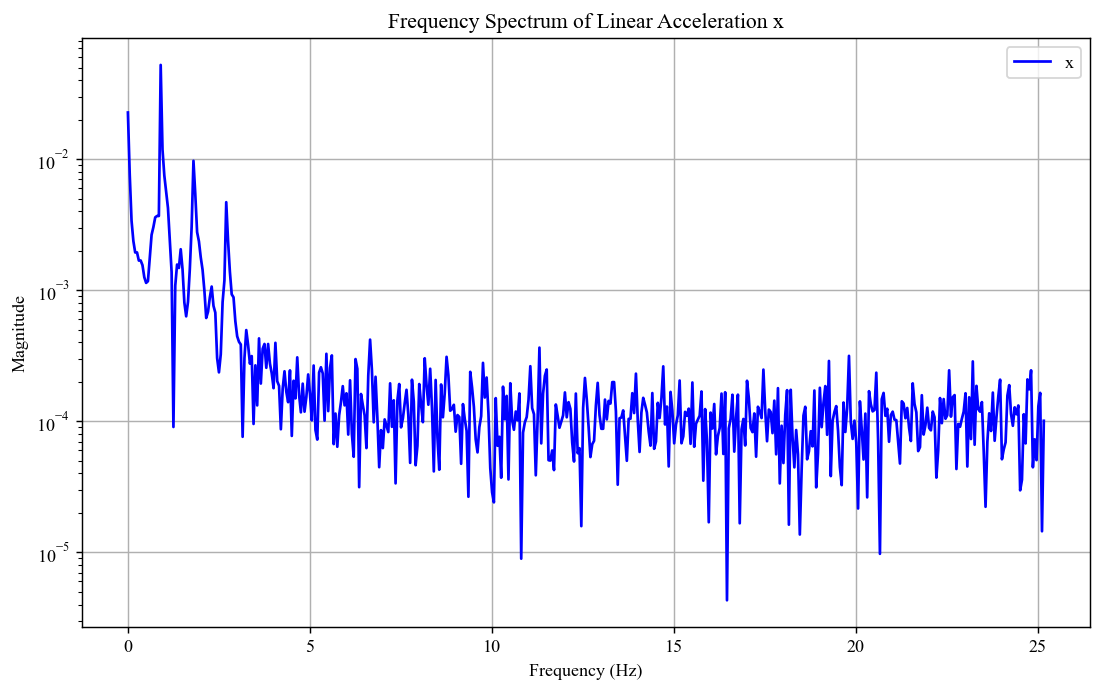

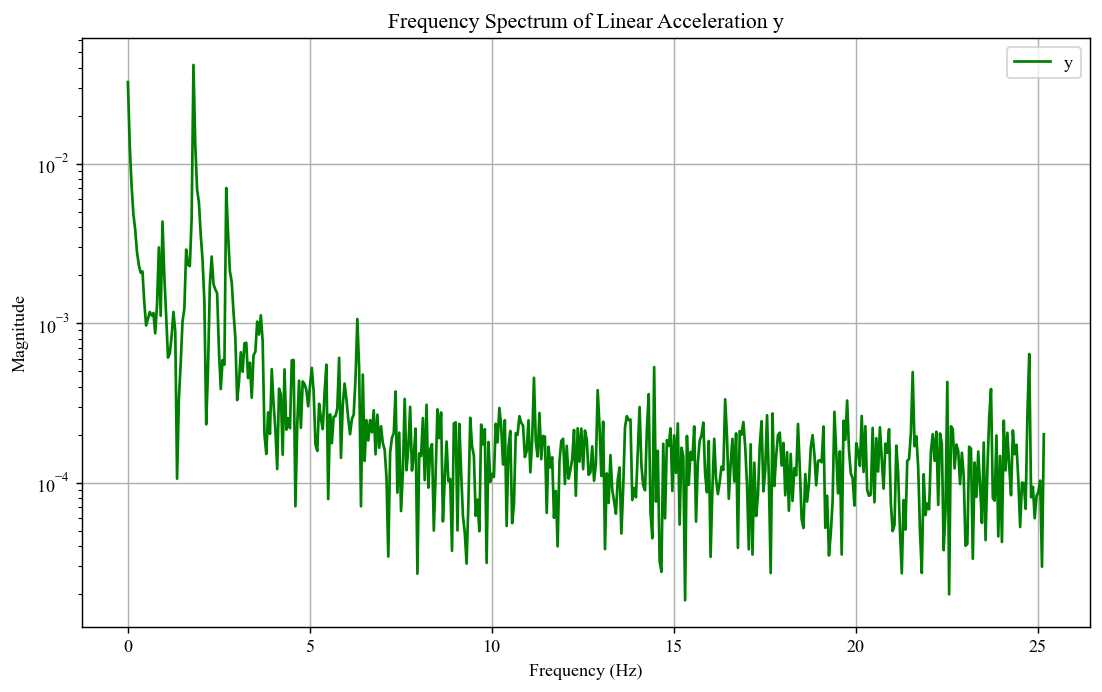

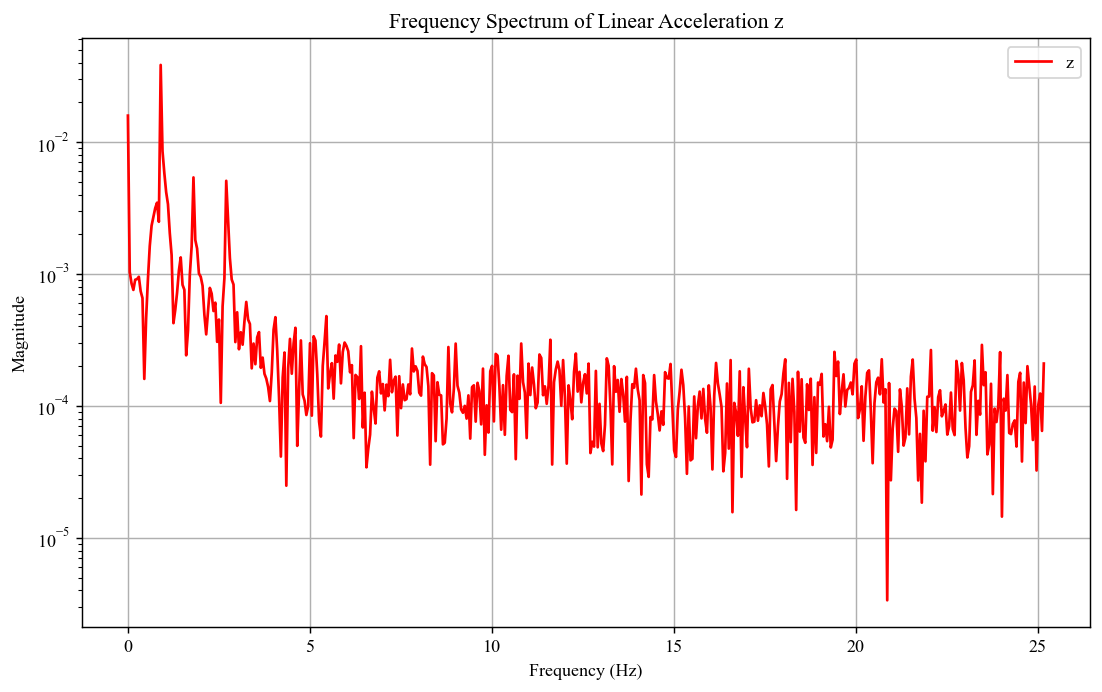

In [54]:
import numpy as np

plt.figure(figsize=(10, 6), dpi=130)
plt.plot(xf, np.abs(X), label='x', color='blue')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Linear Acceleration x")
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6), dpi=130)
plt.plot(xf, np.abs(Y), label='y', color='green')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Linear Acceleration y")
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6), dpi=130)
plt.plot(xf, np.abs(Z), label='z', color='red')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Linear Acceleration z")
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.show()

仔细观察后 20.75-22s应该是空载

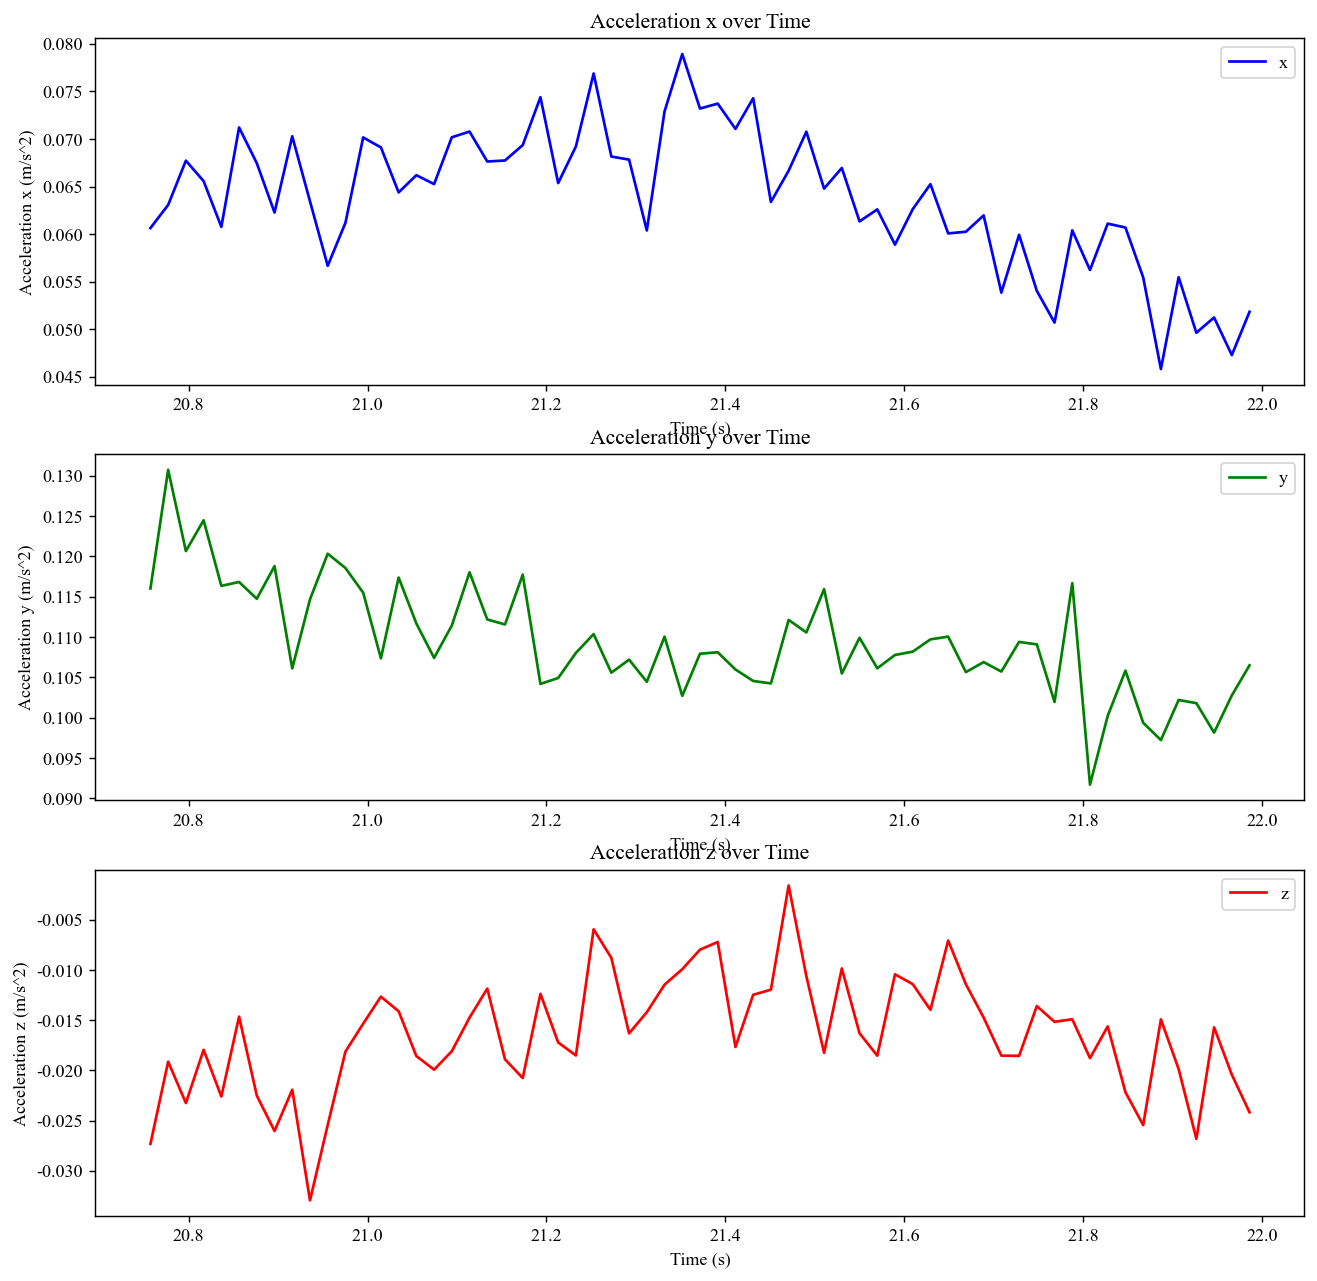

In [57]:
df_sliced2 = df_raw[(df_raw['Time (s)'] >= 20.75) & (df_raw['Time (s)'] <= 22)]
# Plot acceleration over time
plt.figure(figsize=(12, 12), dpi=130)

plt.subplot(3, 1, 1)
plt.plot(df_sliced2['Time (s)'], df_sliced2['Linear Acceleration x (m/s^2)'], label='x', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration x (m/s^2)')
plt.title('Acceleration x over Time')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_sliced2['Time (s)'], df_sliced2['Linear Acceleration y (m/s^2)'], label='y', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration y (m/s^2)')
plt.title('Acceleration y over Time')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_sliced2['Time (s)'], df_sliced2['Linear Acceleration z (m/s^2)'], label='z', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration z (m/s^2)')
plt.title('Acceleration z over Time')
plt.legend()


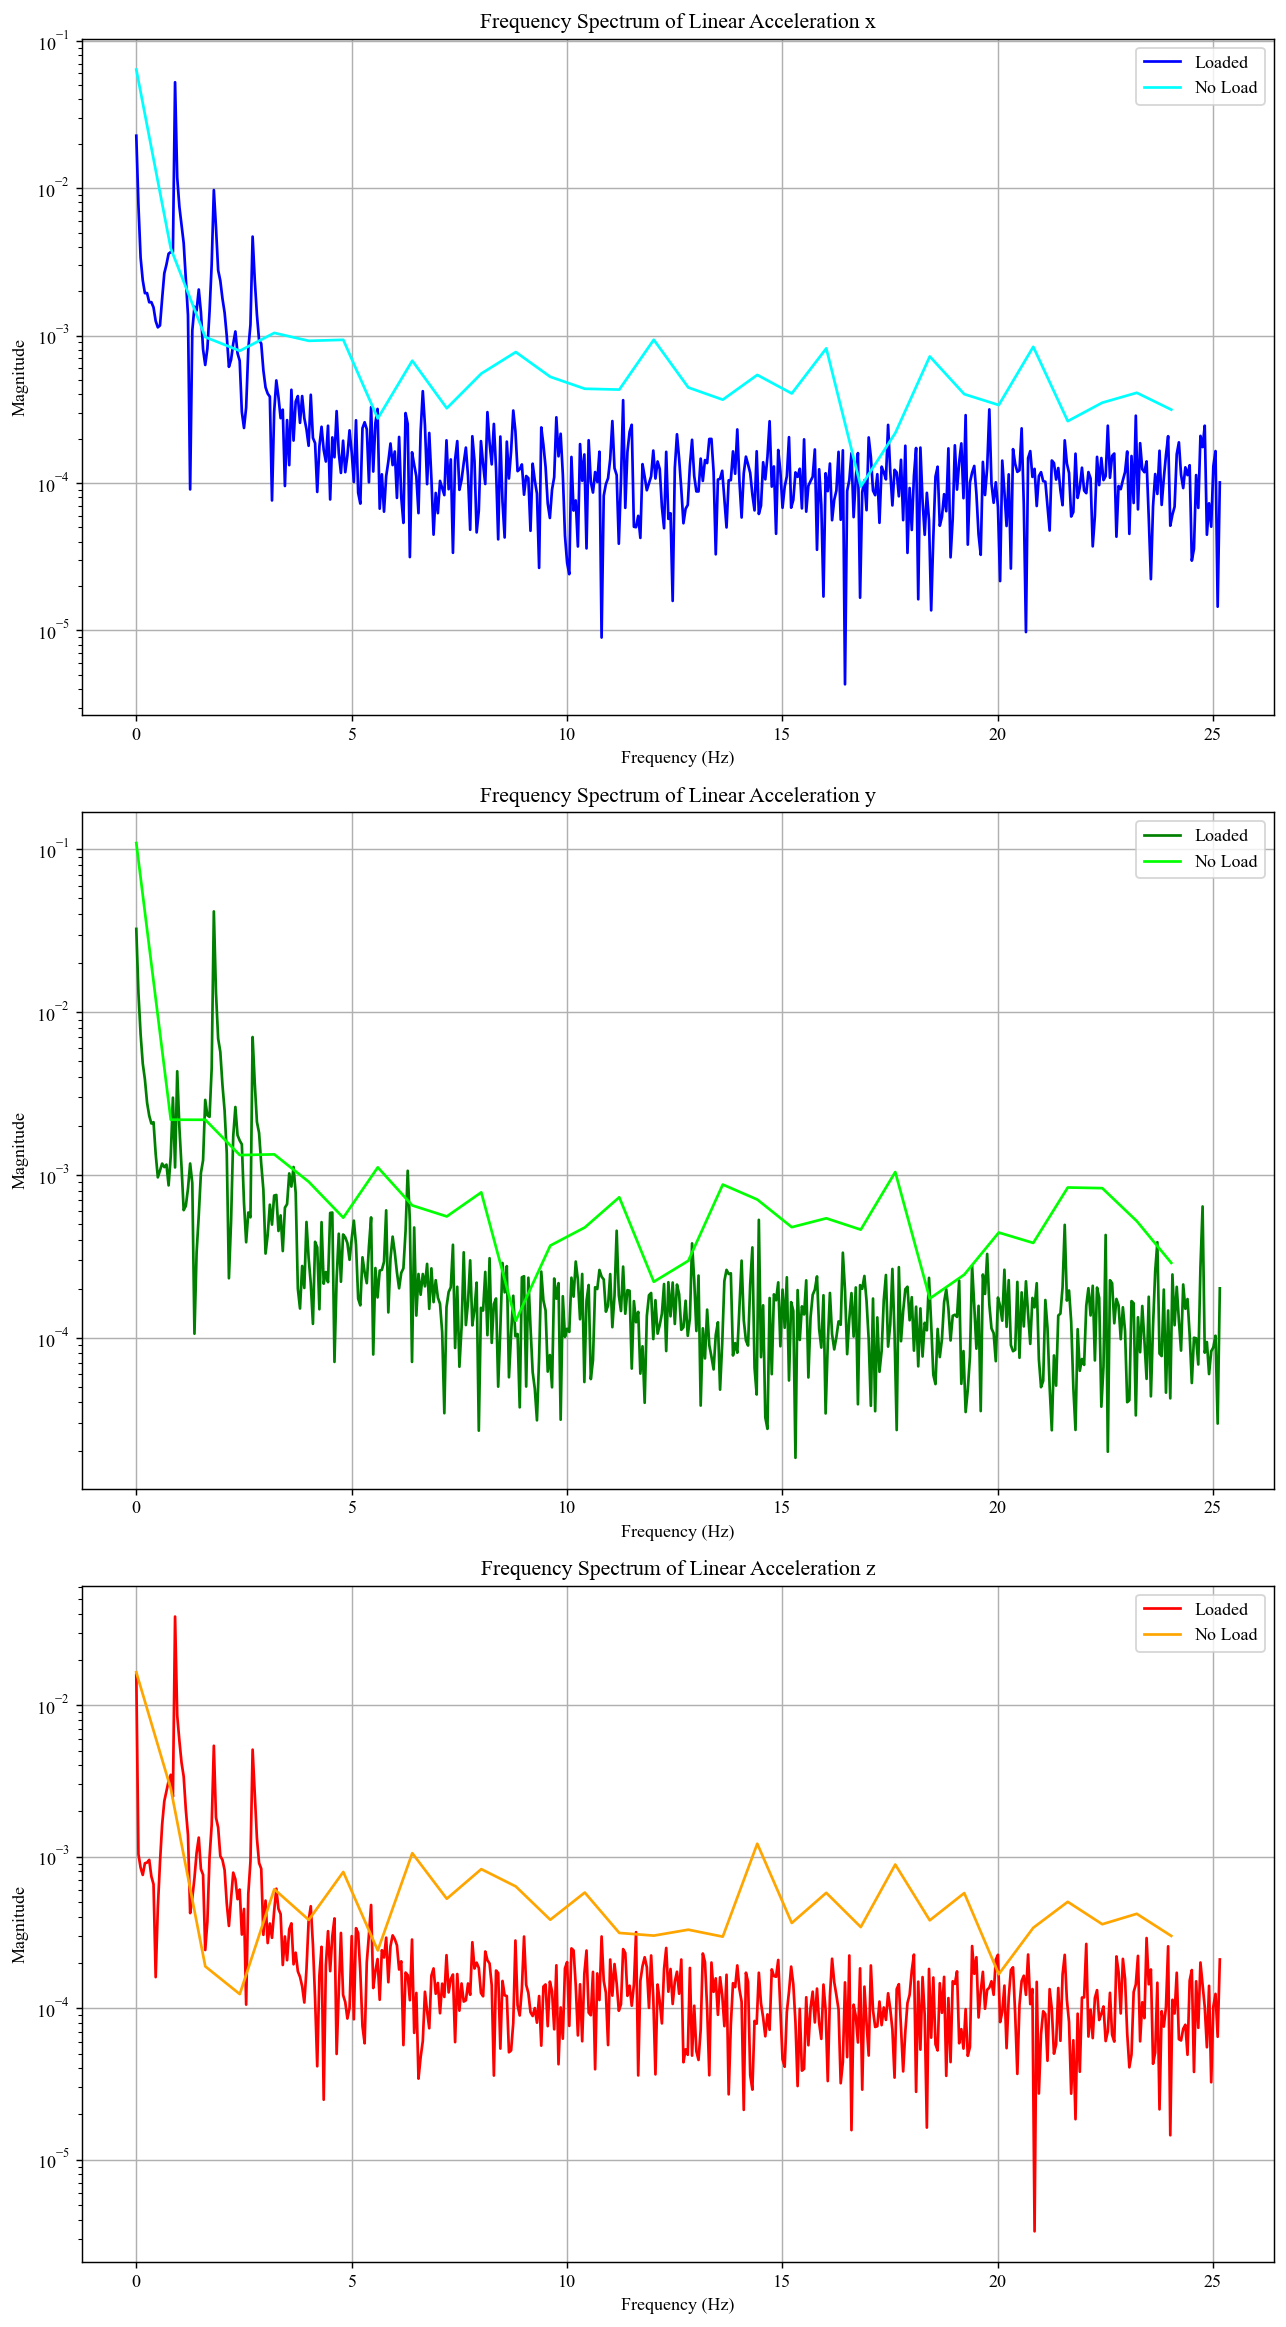

In [62]:
# 从 df_sliced 中提取加速度数据和时间（负载情况）
time2 = df_sliced2['Time (s)'].values
# 从 df_sliced2 中提取加速度数据（空载情况）
x_acc2 = df_sliced2['Linear Acceleration x (m/s^2)'].values
y_acc2 = df_sliced2['Linear Acceleration y (m/s^2)'].values
z_acc2 = df_sliced2['Linear Acceleration z (m/s^2)'].values

# 计算采样频率
sampling_rate = 1 / (time2[1] - time2[0])

# 计算 FFT
N = len(time2)
xf2 = fftfreq(N, 1 / sampling_rate)
X2 = fft(x_acc2) / N
Y2 = fft(y_acc2) / N
Z2 = fft(z_acc2) / N

# 由于对称性，只保留单边频谱
xf2 = xf2[:N//2]

X2 = X2[:N//2]
Y2 = Y2[:N//2]
Z2 = Z2[:N//2]

# 绘制频谱图
fig, axes = plt.subplots(3, 1, figsize=(10, 18), dpi=130)

# 绘制 x 轴加速度频谱图
axes[0].plot(xf, np.abs(X), label='Loaded', color='blue')
axes[0].plot(xf2, np.abs(X2), label='No Load', color='cyan')
axes[0].set_xlabel("Frequency (Hz)")
axes[0].set_ylabel("Magnitude")
axes[0].set_title("Frequency Spectrum of Linear Acceleration x")
axes[0].set_yscale('log')
axes[0].legend()
axes[0].grid(True)

# 绘制 y 轴加速度频谱图
axes[1].plot(xf, np.abs(Y), label='Loaded', color='green')
axes[1].plot(xf2, np.abs(Y2), label='No Load', color='lime')
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Magnitude")
axes[1].set_title("Frequency Spectrum of Linear Acceleration y")
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid(True)

# 绘制 z 轴加速度频谱图
axes[2].plot(xf, np.abs(Z), label='Loaded', color='red')
axes[2].plot(xf2, np.abs(Z2), label='No Load', color='orange')
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_ylabel("Magnitude")
axes[2].set_title("Frequency Spectrum of Linear Acceleration z")
axes[2].set_yscale('log')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

# 1.不同工作状态下振动频率成分的差异分析

根据上图可以看出，在机床不同工作状态下，振动频率成分的差异如下：

空载运行状态：

- 主要表现为机床基本频率，通常是由主轴转速所决定的频率
- 空载振动通常是高频振动，振幅较小

载荷运行状态：

- 除了基本频率外，还会出现与切削过程相关的高频分量
- 负载振动则是低频振动，振幅会明显增大

# 2. 低采样率对振动分析的影响和如何选择

低采样率会导致混叠现象，其中信号中的高频成分被误解为低频，从而错误地表示真实的振动频率。当采样率小于信号最高频率成分的两倍时，就会发生混叠现象。

根据**奈奎斯特采样**定理，为了准确表示信号，采样率（$f_s$）必须至少是信号中最高频率（$f_\text{max}$）的两倍。基于从 FFT 分析中获得的频谱（最大频率为 $f_\text{max}=2.75 \text{Hz}$），避免混叠所需的最低采样率为 $f_s = 2 \times 2.75 \text{Hz} = 5.5 \text{Hz}$。如果采样率低于 5.5 Hz，高于采样率一半的高频振动将被混叠到低频谱中，可能掩盖实际的机器振动或产生错误的峰值。因此，频谱将无法正确表示机器的真实振动特性。在实践中，建议使用显著高于最低要求速率的采样率（例如，高出 2 到 10 倍），以应对实际的复杂情况。所以我们这里最高有25Hz

没有看到更新，下面是更新后的思考题

（1）在加工状态下，机床的刀具与工件接触，切削力会引起机床的振动，力导致加速度变大。

这些振动包括切削力引起的周期性振动、刀具与工件之间的摩擦振动以及由于切削过程中的不均匀性引起的随机振动。此外，机床的电机和传动系统在负载下也会产生额外的振动

（2）故障状态判断
频谱分析：对加速度波形进行FFT，频域图中会出现异常的频率峰值，可能表明存在异常振动。
时域分析：观察加速度波形的时域图，可能出现突发性的大幅振动，不稳定。
统计分析：计算加速度波形的统计特征，如均值、标准差、峰值等。如果这些特征值显著偏离正常范围，可能表明存在异常振动。

可能与哪些部件相关：

- 传动系统：齿轮、皮带或联轴器的磨损、松动或不对中可能导致异常振动。
- 刀具不平衡：在主轴转速频率处出现显著的高幅值
- 零件松动：可能产生随机的、不规律的频率成分
- 主轴：主轴轴承磨损、松动或不平衡可能导致异常振动
- 电机：电机故障或电源问题可能导致异常振动。